# **Example 6** Validation of ATLID level 2 data

This notebook shows how A-EBD profiles (backscatter, extinction, lidar ratio and depol. ratio) can be compared with ground-based data from `.nc`-files.

In [49]:
import earthcarekit as eck

## Requirements

For this example you need a A-EBD file from an overpass and the matching ground data (e.g., PollyNET `.nc`-file).

Paste both file paths into the cell below:

In [50]:
#fp_aebd = r"D:\earthcarekit_new\ec_data\ECA_EXAG_ATL_EBD_2A_20250620T134014Z_20250620T153539Z_06031D.h5"
#fp_ground = r"D:\earthcarekit_new\ec_data\2025_06_20_Fri_ARI_00_00_01_1246_1345_profiles.nc"
#prefix = "06031D_20250620"
#fp_aebd = r"D:\earthcarekit_new\ec_data\ECA_EXBA_ATL_EBD_2A_20240918T134404Z_20250727T182434Z_01752D.h5"
#fp_ground = r"D:\earthcarekit_new\ec_data\2024_09_18_Wed_ARI_00_00_01_1321_1420_profiles.nc"
#prefix = "01752D_20240918"
#site = "TROPOS"

# Also specify the ground site by either setting its name (string) or creating a custom GroundSite object:
site = "meteor_20250126"
fp_aebd = r"D:\earthcarekit_new\ec_data\ECA_EXBA_ATL_EBD_2A_20250126T041104Z_20250721T123254Z_03769A.h5"
fp_ground = r"D:\earthcarekit_new\ec_data\2025_01_26_Sun_ARI_00_00_01_0424_0531_profiles.nc"
prefix = "03769A_20250126"
radius_km = 100.0

In [51]:
meteor_20250126 = eck.GroundSite(
    latitude=4.28,
    longitude=-35.35,
    altitude=15,
    name="x"
)


## **6.1** Open and view datasets

In [52]:
print("Open the A-EBD dataset:")
with eck.read_product(fp_aebd) as ds_aebd:
    display(ds_aebd)

print("Open the ground-based dataset:")
with eck.read_nc(fp_ground) as ds_ground:
    display(ds_ground)

Open the A-EBD dataset:


<xarray.Dataset> Size: 230MB
Dimensions:                                                         (
                                                                     along_track: 4869,
                                                                     vertical: 242,
                                                                     layer: 25,
                                                                     n_state: 351)
Dimensions without coordinates: along_track, vertical, layer, n_state
Data variables: (12/74)
    filename                                                        <U60 240B ...
    file_type                                                       <U10 40B ...
    frame_id                                                        <U1 4B 'A'
    orbit_number                                                    uint32 4B ...
    orbit_and_frame                                                 <U6 24B '...
    baseline                                                        <U2 8B 'BA'
    ...                                                              ...
    lidar_ratio_355nm_low_resolution_error                          (along_track, vertical) float32 5MB ...
    retrieved_state_vector                                          (along_track, n_state) float32 7MB ...
    state_vector_prior                                              (along_track, n_state) float32 7MB ...
    state_vector_prior_error                                        (along_track, n_state) float32 7MB ...
    final_chi_square                                                (along_track) float32 19kB ...
    initial_chi_square                                              (along_track) float32 19kB ...

2025-08-05 13:23:09,111 [I] c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\utils\read\nc.py:37 - Convert height above ground level to height above ellipsoid.


Open the ground-based dataset:


<xarray.Dataset> Size: 960kB
Dimensions:                          (method: 1, height: 3000,
                                      reference_height: 2)
Dimensions without coordinates: method, height, reference_height
Data variables: (12/92)
    longitude                        (method) float32 4B ...
    latitude                         (method) float32 4B ...
    start_time                       (method) datetime64[s] 8B 2025-01-26T04:...
    end_time                         (method) datetime64[s] 8B 2025-01-26T05:...
    shots                            (method) int32 4B ...
    zenith_angle                     (method) float32 4B ...
    ...                               ...
    LR_aeronet_532                   (method) float32 4B ...
    LR_aeronet_1064                  (method) float32 4B ...
    reference_height_355             (reference_height) float32 8B ...
    reference_height_532             (reference_height) float32 8B ...
    reference_height_1064            (reference_height) float32 8B ...
    height                           (height) float32 12kB 128.8 ... 2.254e+04
Attributes: (12/14)
    Conventions:          CF-1.0
    Licence:              Creative Commons Attribution Share Alike 4.0 Intern...
    Data Policy:          Each PollyNET site has Principal Investigator(s) (P...
    location:             Meteor
    institute:            Ground-based Remote Sensing Group (TROPOS)
    source:               arielle
    ...                   ...
    contact:              Holger Baars <baars@tropos.de>
    PicassoConfig_Info:   fileinfo_new:/pollyhome/Bildermacher2/todo_filelist...
    PollyConfig_Info:     flagCorrectFalseMShots:1,flagFilterFalseMShots:0,fl...
    CampaignConfig_Info:  name:arielle,location:Meteor,startTime:739622,endTi...
    PollyData_Info:       pollyType:arielle,pollyDataFile:/pollyhome/Bilderma...
    history:              Last processing time at 2025-03-14 22:02:26 by poll...

Create a quicklook of the overpass from the A-EBD file:
Note: When plotting profiles from A-PRO products, the `ecquicklook` function will automatically plot only the closest profile within the set radius.


2025-08-05 13:23:31,277 [I] c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\plot\quicklook\_cli.py:25 - Plot created (time taken 00:00:22).                                   


Save the quicklook:
Plot saved (time taken 00:00:04): <d:\earthcarekit_new\examples\notebooks\03769A_20250126_aebd_quicklook.png>


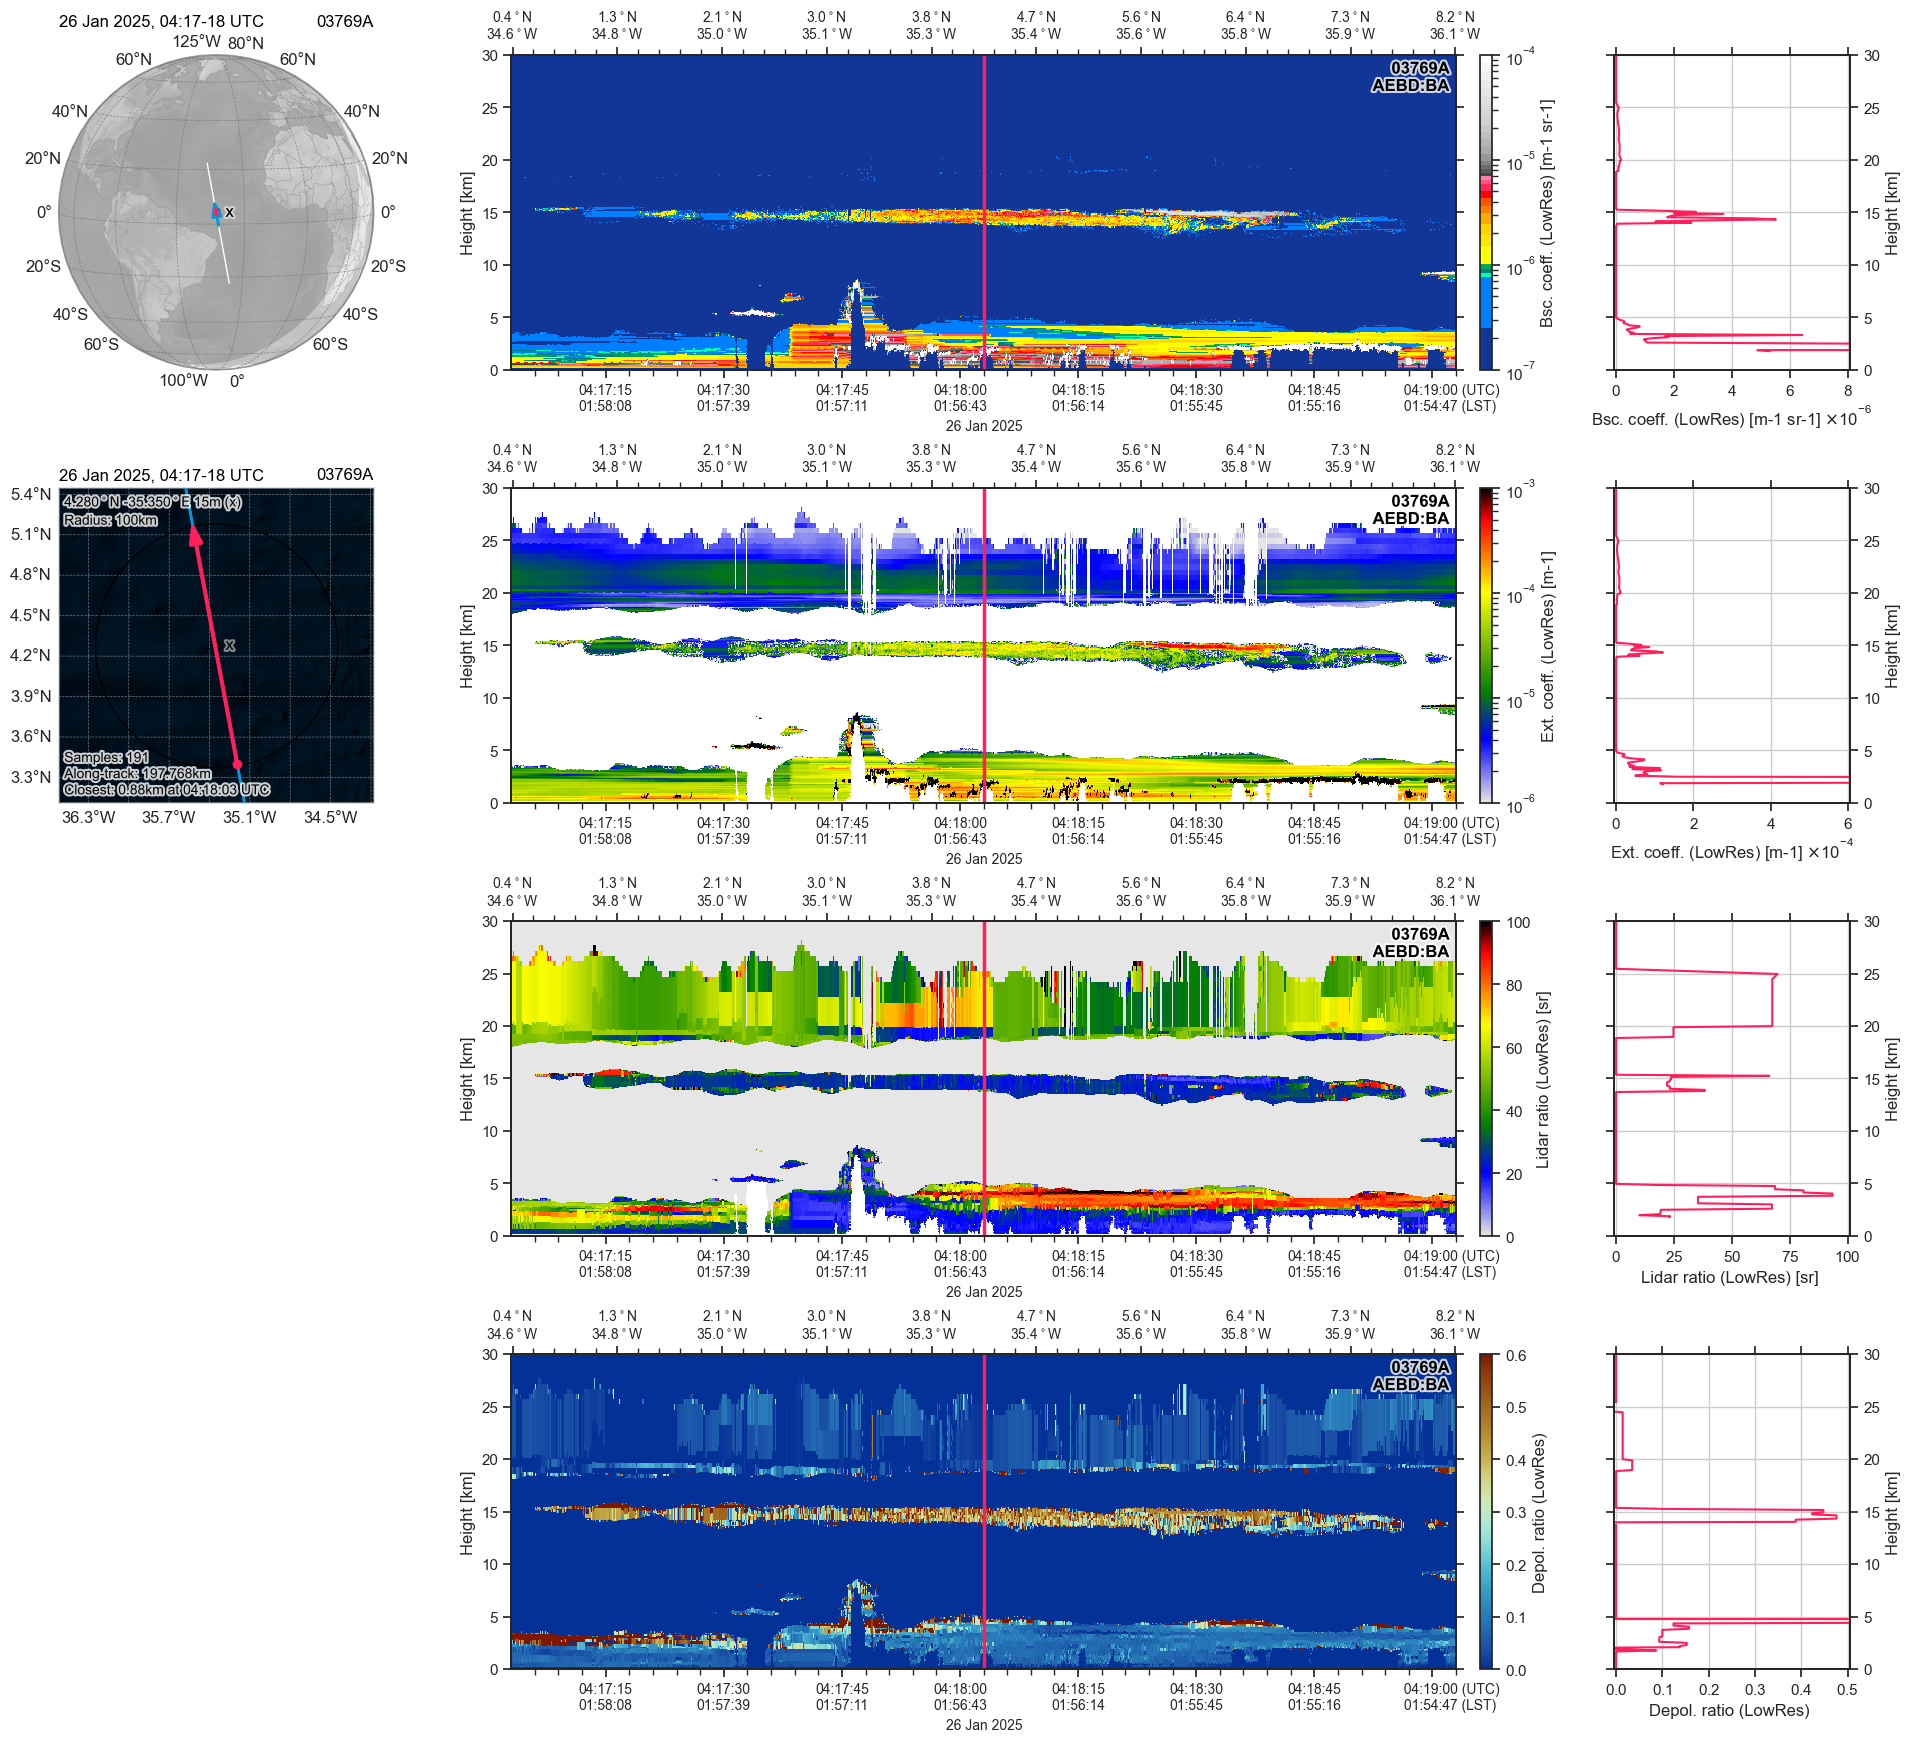

In [ ]:
import logging
print("Create a quicklook of the overpass from the A-EBD file:")
print("Note: When plotting profiles from A-PRO products, the `ecquicklook` function will automatically plot only the closest profile within the set radius.")
fig, _ = eck.ecquicklook(
    ds=ds_aebd,
    site=site,#meteor_20250126,
    radius_km=radius_km,
    resolution="low",  # Change the A-EBD resolution as needed
    height_range=(0, 30e3),  # Change the plotting height as needed
    selection_max_time_margin="00:01:00",  # Crop the plot to show only 1 Minute around the overpass start and end times
    logger=logging.getLogger(),  # Optional: Shows plotting progress
)
print("Save the quicklook:")
eck.save_plot(fig, filepath=("./"+prefix+"_aebd_quicklook.png"))

## **Example 6.2** Create backscatter, extinction, lidar ratio and depol. ratio profile plots and comparison statistics 

2025-08-05 13:25:37,223 [I] c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\utils\read\nc.py:37 - Convert height above ground level to height above ellipsoid.
c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\calval\_compare_bsc_ext_lr_depol.py:74: UserWarning: Variable `aerExt_klett_355` not in ground-based data.
  warnings.warn(msg)
c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\calval\_compare_bsc_ext_lr_depol.py:74: UserWarning: Variable `aerLR_klett_355` not in ground-based data.
  warnings.warn(msg)


,prediction,target,hmin,hmax,diff_of_means,mae,rmse,mean_diff,mean_prediction,std_prediction,mean_error_prediction,mean_target,std_target,mean_error_target
0,A-EBD low res.,aerBsc_klett_355,2000.0,4000.0,-0.000101,0.000101,0.000260,-0.000101,0.000101,0.000239,0.000059,3.427586e-07,1.631511e-07,None
1,A-EBD low res.,aerBsc_raman_355,2000.0,4000.0,-0.000100,0.000100,0.000260,-0.000100,0.000101,0.000239,0.000059,4.465521e-07,1.395679e-07,None
2,A-EBD low res.,aerExt_raman_355,2000.0,4000.0,-0.001942,0.001943,0.004953,-0.001942,0.001955,0.004557,0.002981,1.272118e-05,1.379461e-05,None
3,A-EBD low res.,aerLR_raman_355,2000.0,4000.0,-16.487542,26.978916,39.336470,-16.487543,45.614532,24.229685,9.184697,2.912699e+01,3.489996e+01,None
4,A-EBD low res.,parDepol_klett_355,2000.0,4000.0,-0.101014,0.101014,0.104694,-0.101014,0.116348,0.025926,0.029393,1.533416e-02,1.057376e-02,None
5,A-EBD low res.,parDepol_raman_355,2000.0,4000.0,-0.101073,0.101073,0.104458,-0.101073,0.116348,0.025926,0.029393,1.527500e-02,9.102528e-03,None


Save the plot:
Plot saved (time taken 00:00:00): <d:\earthcarekit_new\examples\notebooks\03769A_20250126_aebd_vs_polly_profiles.png>
Save the stat. results:


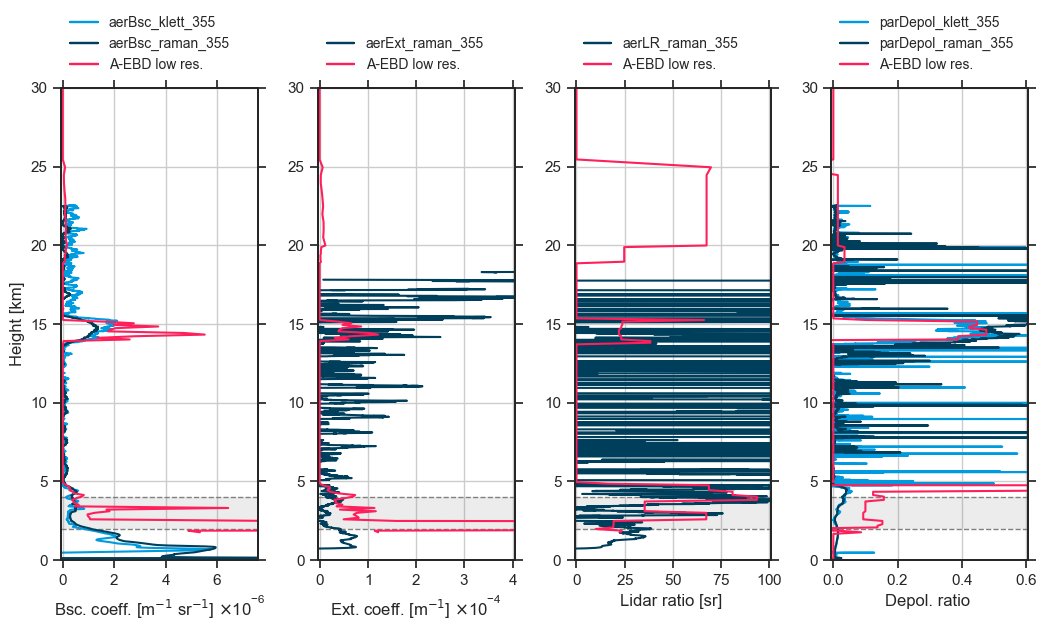

In [ ]:
fig, df = eck.compare_bsc_ext_lr_depol(
    fp_ec=fp_aebd,
    fp_target=fp_ground,
    site=site,#meteor_20250126,
    time_var_target="start_time",  # Set to the time variable name in the ground-based dataset
    height_var_target="height",  # Set to the height variable name in the ground-based dataset
    resolustion="low",  # Change the A-EBD resolution as needed
    bsc_var_target=["aerBsc_klett_355", "aerBsc_raman_355"],  # Give at least one bsc. variable name from the ground-based dataset
    ext_var_target=["aerExt_klett_355", "aerExt_raman_355"],  # Give at least one ext. variable name from the ground-based dataset
    lr_var_target=["aerLR_klett_355", "aerLR_raman_355"],  # Give at least one LR variable name from the ground-based dataset
    depol_var_target=["parDepol_klett_355", "parDepol_raman_355"],  # Give at least one depol. variable name from the ground-based dataset
    vmax_bsc = 0.0000075,
    vmax_ext= 0.0004,
    vmax_lr = 100,
    vmax_depol = 0.6,
    height_range=(0, 30e3),  # Change the plotting height as needed
    selection_height_range=(2e3, 4e3),  # Change the selected height range to get statistics from as needed or set to None
)
display(df)

print("Save the plot:")
eck.save_plot(fig, filepath=("./"+prefix+"_aebd_vs_polly_profiles.png"))

print("Save the stat. results:")
df.to_csv(("./"+prefix+"__aebd_vs_polly_profiles.csv"), index=False)